# Opening and Modifying Images using OpenCV

## 1. Installation and Imports
You must install the "OpenCV" library the first time you use this code. After you installed it, you can comment the installation line adding a "#" in front of it:

In [ ]:
# Run the following line to Install OpenCV for the first time
#!pip install opencv-contrib-python

In [1]:
# Import the other libraries needed
import numpy as np
import os
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
# Print what is the versions of python and OpenCV you have (for your records)
import sys
print("My version of Python is:", sys.version)
print("My OpenCV version is:", cv.__version__)

My version of Python is: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
My OpenCV version is: 4.8.1


## 2. What is an image

Images are 2D arrays of pixels. The pixels of an image have only one color, which is reprented with three numbers ranging 0-255. These numbers identify the amount of **R**ed, **G**reen, and **B**lue  (RGB) of the color of a particular pixel.

For example, the "Ferrari red" color: (255, 40, 0) has three components: Red = 255 (pure red); Green = 40; Blue = 0 (no blue at all).

Image files, like .jpg or.png, are nothing but 3 independent matrices: One matrix for the amount of red, one for the amount of green, and another one with the amount of blue of each of the pixels of the image. All the R, G, B matrices have the same size. The size of these matrices match the **height** and the **width** of the image.

## 3. Loading Images

First, make sure that, in the same directory where you have this notebook (.ipynb file), you have the folder called "Photos", which contains the different examples to use during this lesson.

Then, run the next cell and notice how the colors of the image you are opening are distorted!
There is nothing to worry, as OpenCV opens (by default) all images as BRG (Blue-Red-Green) images. We will fix that latter, if needed.

This is the image I just loaded:
The colors are weird because the image was read as BRG, OpenCV's default.


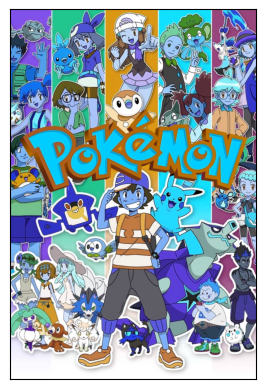

In [3]:
path = "Photos/pokemon.jpg"
#path = "Photos/red_car.jpg"
#path = "Photos/Girl_with_a_Pearl_Earring.jpg"
#path = "Photos/starry_night.jpg"
#path = "Photos/Spidey.png"

img_BGR = cv.imread(path)
print("This is the image I just loaded:")
print("The colors are weird because the image was read as BRG, OpenCV's default.")
plt.imshow(img_BGR) # open the image as Blue-Red-Green (BRG), the OpenCV's default imread mode)
plt.xticks([]),plt.yticks([]) #removes axis
plt.show() #this line displays the image with all the requirements you demanded before

### 2.1. Transforming BRG images into RGB images

To see the image you loaded on its original true colors you can simply shuffle its BLUE, RED, GREEN matrices into RED, GREEN, BLUE (RGB) using this code:

Here is my image in its true RGB color:


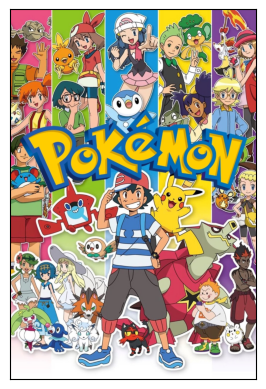

In [4]:
#transform the image into the conventional Red-Green-Blue (RGB) mode
img_RGB = cv.cvtColor(img_BGR, cv.COLOR_BGR2RGB)

print("Here is my image in its true RGB color:")
plt.imshow(img_RGB) # open the image as RGB
plt.xticks([]),plt.yticks([])
plt.show()

## 3. Color histograms

Color histograms are very important to identify the predominant colors on an image. A color histogram will help python to identify if an object is 
The following code creates a graph that displays the histograms of each of the three matrices comprising img_RGB (RED matrix, GREEN matrix, BLUE matrix):

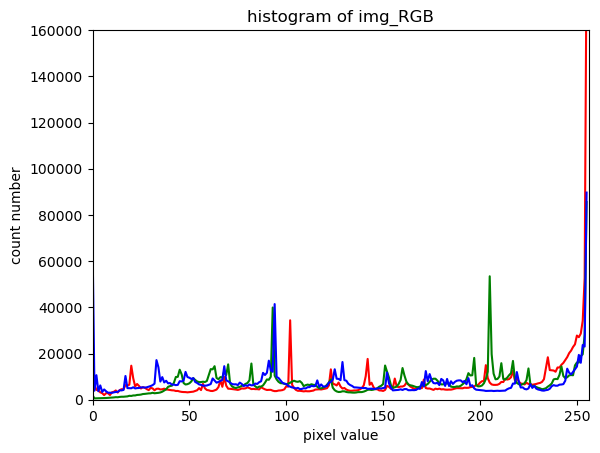

In [5]:
colors = ('r','g','b') #colors to use on the histogram
for i, col in enumerate(colors):
    histr = cv.calcHist([img_RGB],[i],None,[256],[0,256])
    plt.plot(histr,color= col)
plt.title("histogram of img_RGB")
plt.xlabel("pixel value")
plt.ylabel("count number")
plt.xlim([0,256])
plt.ylim([0,160000])
plt.show()

### 3.1. Finding the predominant color of an image using color histograms

Color histograms make it very easy to find the predominant color of an image by simply identifying the color channel with the highest peak. In the following example, we will identify the color of the car in the images:  ***red_car.jpg*** and ***blue_car.jpg***

Blue: 3866
Green: 0
Red: 4


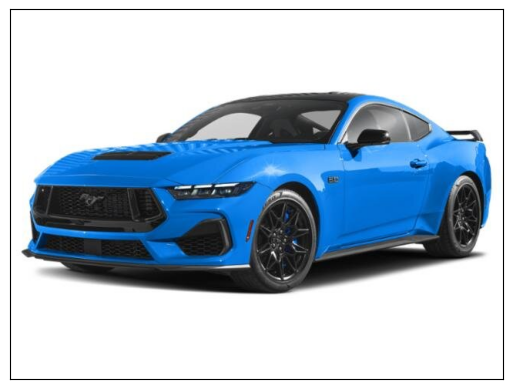

Blue: 471
Green: 1181
Red: 3820


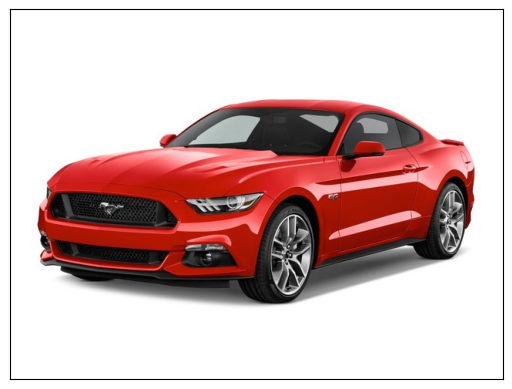

In [6]:
def get_predominant_color(image):
  """
  Finds the predominant color of an image and returns a simple BGR tuple.

  Args:
      image: A BGR image as a NumPy array.

  Returns:
      A simple BGR tuple (B, G, R) with values in the range 0-255.
  """
  # Convert image to RGB for consistency with histogram channels
  image_RGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  # Calculate histograms for each color channel
  hist_b = cv.calcHist([image_RGB], [0], None, [256], [0, 256])
  hist_g = cv.calcHist([image_RGB], [1], None, [256], [0, 256])
  hist_r = cv.calcHist([image_RGB], [2], None, [256], [0, 256])

  # Find the channel with the highest peak and get its index
  max_value_index = np.argmax([np.max(hist_b), np.max(hist_g), np.max(hist_r)])

  # Extract the predominant color value directly from the histogram (rounded to 0-255)
  predominant_color = int(hist_b[max_value_index]), int(hist_g[max_value_index]), int(hist_r[max_value_index])

  return predominant_color


# Open image that we want to analyze
image = cv.imread("Photos/blue_car.jpg")

# Find the predominant color
predominant_color = get_predominant_color(image)
print("Blue:", predominant_color[0])
print("Green:", predominant_color[1])
print("Red:", predominant_color[2])

# Display image
img_RGB_car = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(img_RGB_car) # open the image as RGB
plt.xticks([]),plt.yticks([])
plt.show()



# Open another image that we want to analyze
image = cv.imread("Photos/red_car.jpg")

# Find the predominant color
predominant_color = get_predominant_color(image)
print("Blue:", predominant_color[0])
print("Green:", predominant_color[1])
print("Red:", predominant_color[2])

# Display image
img_RGB_car = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(img_RGB_car) # open the image as RGB
plt.xticks([]),plt.yticks([])
plt.show()

## 4. Transforming images into grayscale

Very often, you want your computer vision algorithms to run as fast as possible. To do so, it is best to "reduce the dimensionality of your problem" by transforming the original color image (three 2D matrices stacked: containing the RED values, GREEN values, and BLUE values of each pixel) into a single-matrix grayscale image with values going from 0 (black) to 255 (white):

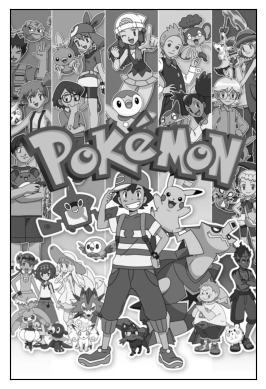

In [9]:
#Transform color image to grayscale:
img_BGR = cv.imread(path)
img_gray = cv.cvtColor(img_RGB, cv.COLOR_RGB2GRAY)
#Note that this operation is destructive, as your
plt.imshow(img_gray, cmap='gray') # open the image as gray
plt.xticks([]),plt.yticks([])
plt.show()

## 5. Size of your images

To measure the dimensions of your image you can use **.shape**, which has the following structure: (height, width, number of matrices). When you have a colored (BGR or RGB) image, the shape of your image will be (height, width, 3). If you transform a color image into grayscale the shape of your image will be (height, width), as the 1 is implicit by the lack of the third component. Notice that grayscale conversion is a **"destructive modification"**, as you are loosing information (color!) by **irreversibly** merging 3 matrices into only 1.

In [11]:
#If you want to know the dimensions of your image
pixels_Y, pixels_X = img_gray.shape
print("My image gray is", pixels_Y, "pixels tall and", pixels_X, "pixels wide")

#Note how we passed from having 3 color matrices (R, G, B) to only having 1
print("The shape of my color image is", img_RGB.shape)
print("The shape of my grayscale image is", img_gray.shape)

My image gray is 1705 pixels tall and 1137 pixels wide
The shape of my color image is (1705, 1137, 3)
The shape of my grayscale image is (1705, 1137)


## 6. Transforming the images into black and white

In grayscale images, each pixel value represents the brightness level of that pixel, typically ranging from 0 (black) to 255 (white).

While grayscale images have only one matrix and are easy to compute, computer vision algorithms tracking objects find it difficult to work with gray frontiers, as they become unsure about if an object is there or not. To overcome this problem we will create pure black and white images by applying a **threshold** to a grayscale image. This will transform our matrix (black and white image) into a matrix integrated only by zeros and 255 and no number in between. As you can imaging, tracking algorithms find it very easy to track an object when it is pure black (or white) in a background white (or black).

shape of the BGR image: (1705, 1137, 3)
shape of the gray image: (1705, 1137)
shape of the threshold image: (1705, 1137)


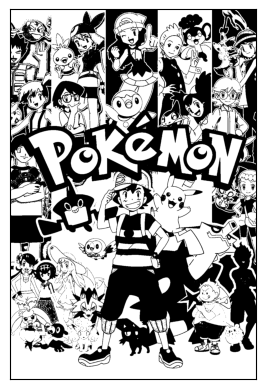

In [12]:
path = "Photos/pokemon.jpg"
#path = "Photos/Girl_with_a_Pearl_Earring.jpg"

# Load image as default BGR
img_BGR = cv.imread(path)
print("shape of the BGR image:", img_BGR.shape)

# Transform the image to grayscale (from 3 matrices of the BRG image to only one gray matrix)
img_gray = cv.cvtColor(img_BGR, cv.COLOR_BGR2GRAY)
print("shape of the gray image:", img_gray.shape)

# Transform the image to threshold image (purely black or white, no whites)
ret,thresh_img = cv.threshold(img_gray,127,255,cv.THRESH_BINARY)
print("shape of the threshold image:", thresh_img.shape)

# Plot the black and white (threshold) image
plt.imshow(thresh_img, cmap='gray') #, cmap='gray' open the image as gray
plt.xticks([]),plt.yticks([])
plt.show()

### 6.1. Learning more about image thresholding

Image thresholding is a powerful tool to reduce the noise of your images or video frames and help machine learning algorithms to identify features. The way thresholding work is quite straight-forward: For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type cv.THRESH_BINARY. All simple thresholding types are:

- cv.THRESH_BINARY
- cv.THRESH_BINARY_INV
- cv.THRESH_TRUNC
- cv.THRESH_TOZERO
- cv.THRESH_TOZERO_INV

Here is what each do when you apply them to a simple image of a black and white gradient ("original image"):

![](https://docs.opencv.org/4.x/threshold.jpg)

Image thresholding on color images:


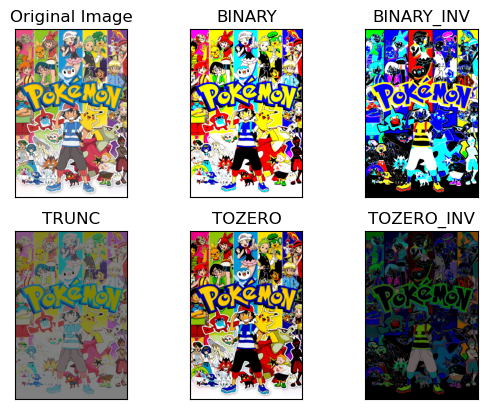

Image thresholding on grayscale images:


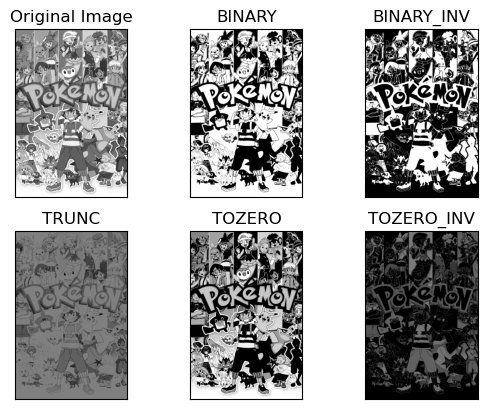

In [13]:
# Image thresholding on color images
print("Image thresholding on color images:")
ret,thresh1 = cv.threshold(img_RGB,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img_RGB,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img_RGB,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img_RGB,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img_RGB,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_RGB, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

print("Image thresholding on grayscale images:")
# Image thresholding on grayscale images
ret,thresh1 = cv.threshold(img_gray,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img_gray,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img_gray,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img_gray,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img_gray,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 7. Increasing Image Contrast

The contrast of grayscale images can be increased using  Contrast Limited Adaptive Histogram Equalization (**CLAHE**). This image processing technique is commonly used to improve the contrast of an image, particularly in areas with low contrast. To apply CLAHE contrast enhancement follow these steps:

1. Use **cv.createCLAHE** to create a CLAHE object. 
2. Then you can optionally define these parameters:

    * **clipLimit** (default 40): This parameter controls the threshold for contrast limiting. Higher values lead to less amplification but potentially less contrast enhancement.

    * **tileGridSize** (default (8, 8)): This defines the size of the tiles used for local histogram equalization. Smaller tiles provide more localized contrast improvement.
    
CLAHE provides a more controlled way to enhance contrast, especially in images with uneven lighting or varying local contrast.
Additionally, it effectively improves the visibility of details in low-contrast areas without introducing excessive noise.

CLAHE is widely used in various image processing tasks, including: Medical imaging (e.g., enhancing X-ray or microscopy images), Remote sensing (e.g., improving the visibility of features in satellite images), Low-light image enhancement, General image processing for improving visual quality.

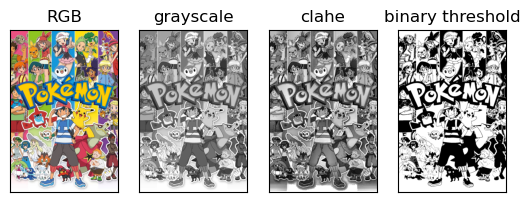

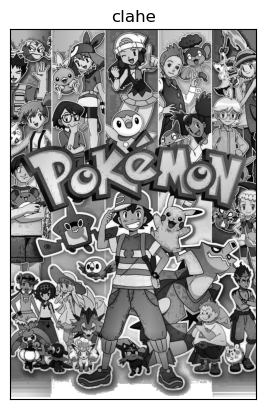

In [15]:
# increase contrast
clahe = cv.createCLAHE(clipLimit=90.0, tileGridSize=(8,8))
cl_gray = clahe.apply(img_gray)

# Initialise the subplot function using number of rows and columns
plt.subplot(1,4,1) # 1 row, 4 columns, element 1
plt.title("RGB")
plt.imshow(img_RGB) # open the image as gray with high contrast
plt.xticks([]),plt.yticks([]) # removes axis
plt.title("RGB")

plt.subplot(1,4,2) # 1 row, 4 columns, element 2
plt.title("grayscale")
plt.imshow(img_gray, cmap='gray') # open the image as gray with high contrast
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,3) # 1 row, 4 columns, element 3
plt.title("clahe")
plt.imshow(cl_gray, cmap='gray') # open the image as gray with high contrast
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,4) # 1 row, 4 columns, element 4
plt.title("binary threshold")
plt.imshow(thresh1, cmap='gray') # open the image as gray with high contrast
plt.xticks([]),plt.yticks([])

plt.show()

# Notice how clahe enhances the contrast while preserving most features:
plt.title("clahe")
plt.imshow(cl_gray, cmap='gray') # open the image as gray with high contrast
plt.xticks([]),plt.yticks([])
plt.show()

## 8. Cropping Images

In many cases, there would be only one part of the image that would be of your interest. This **R**egion **O**f **I**nterest (**ROI**) can be defined using a rectangle that you will use to crop the image. Rectangles in python are defined by two points (in the main diagonal of the rectangle). The coordinate of the first point will be (x,y) and the coordinate of the second one will be (x+W, x+H), where W and H will be the width and height in pixels of your cropped area, respectively. Notice that the top left corner of the image is the pixel (0,0)

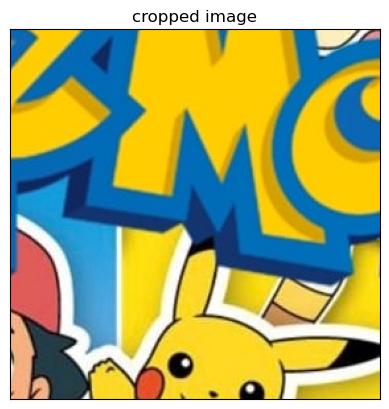

The size of the cropped image is 280 pixels tall and 280 pixels wide


In [16]:
# Define your ROI: Region of Interest
x = 600
y = 600
W = 280
H = 280

crop_img = img_RGB[y:y+H, x:x+W]
plt.imshow(crop_img)
plt.title("cropped image")
plt.xticks([]),plt.yticks([])
plt.show()

print("The size of the cropped image is", crop_img.shape[0], "pixels tall and", crop_img.shape[1], "pixels wide")

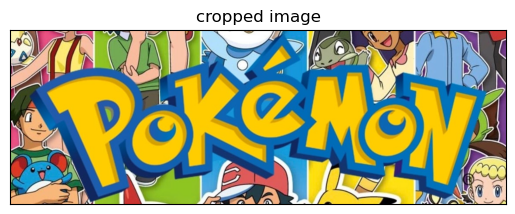

In [17]:
#Let's see how easy is to find any region we want by moving a vertical band of 400 pixels across the image
# Define your ROI: Region of Interest
img_height = img_RGB.shape[0]
img_width = img_RGB.shape[1]

x = 0
y = 450
W = img_width
H = 400

crop_img = img_RGB[y:y+H, x:x+W]
plt.imshow(crop_img)
plt.title("cropped image")
plt.xticks([]),plt.yticks([])
plt.show()

## 9. Blurring Images

Open CV has the method cv.GaussianBlur where you define a window size (x,y) that will be used to smooth your image. Gaussian smoothing is often used as a pre-processing stage in computer vision algorithms in order to enhance image structures at different scales.

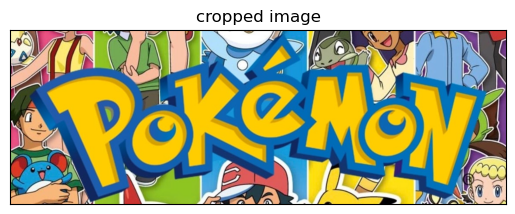

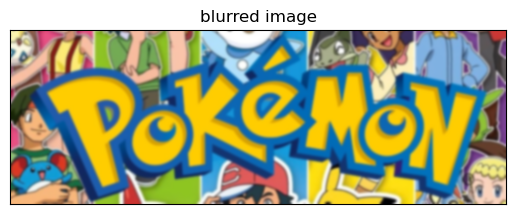

In [18]:
# Let's display the original cropped image first
plt.imshow(crop_img)
plt.title("cropped image")
plt.xticks([]),plt.yticks([])
plt.show()

# Blurring the image
img_blur = cv.GaussianBlur(crop_img,(15,15),0) #the wider the window the higher the blur
plt.imshow(img_blur)
plt.title("blurred image")
plt.xticks([]),plt.yticks([])
plt.show()

## 10. Erosion and Dilation: The best way to isolate elements you want to track in your image

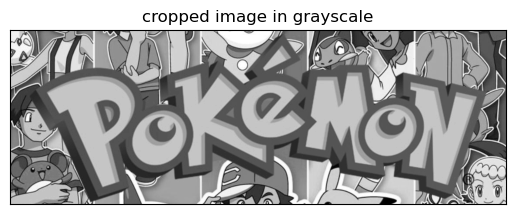

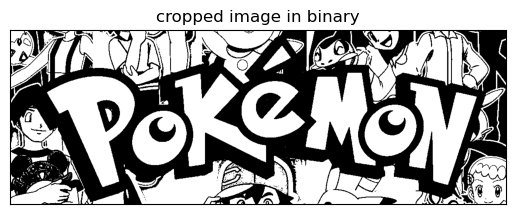

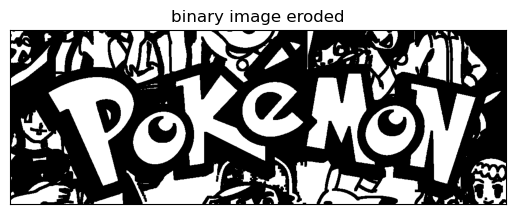

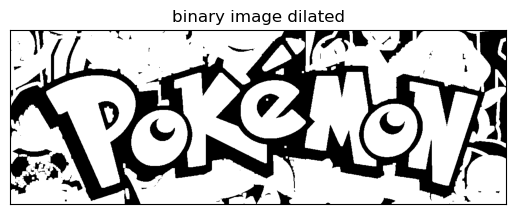

In [25]:
# transform cropped image into grayscale
crop_img_gray = cv.cvtColor(crop_img, cv.COLOR_RGB2GRAY)
plt.imshow(crop_img_gray, cmap='gray')
plt.title("cropped image in grayscale")
plt.xticks([]),plt.yticks([])
plt.show()

# transform image into pure black and white using the binary threshold
ret,crop_thresh = cv.threshold(crop_img_gray,127,255,cv.THRESH_BINARY)
plt.imshow(crop_thresh, cmap='gray')
plt.title("cropped image in binary")
plt.xticks([]),plt.yticks([])
plt.show()

# Creating kernel for both erosion and dilation
kernel = np.ones((5, 5), np.uint8) # the more pixel window, the more dramatic effect

# Eroding
img_erosion = cv.erode(crop_thresh, kernel, iterations=1)
plt.imshow(img_erosion, cmap='gray')
plt.title("binary image eroded")
plt.xticks([]),plt.yticks([])
plt.show()

# Dilation
img_dilation = cv.dilate(crop_thresh, kernel, iterations=1)
plt.imshow(img_dilation, cmap='gray')
plt.title("binary image dilated")
plt.xticks([]),plt.yticks([])
plt.show()

## 11. Re-sizing Images

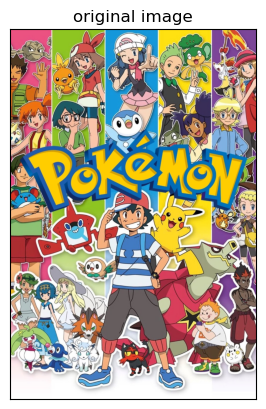

img_RGB is 1705 pixels tall and 1137 pixels wide


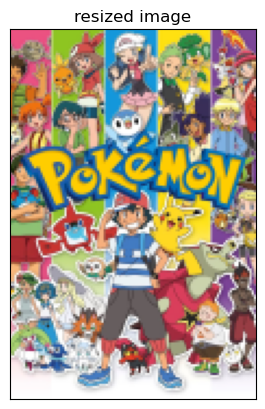

img_resized is 170 pixels tall and 113 pixels wide


In [26]:
plt.imshow(img_RGB)
plt.title("original image")
plt.xticks([]),plt.yticks([])
plt.show()
pixels_Y = img_RGB.shape[0]
pixels_X = img_RGB.shape[1]
print("img_RGB is", pixels_Y, "pixels tall and", pixels_X, "pixels wide")


scale_percent = 10 # percent of original size
reduced_width = int(img_RGB.shape[1] * scale_percent / 100)
reduced_height = int(img_RGB.shape[0] * scale_percent / 100)
reduced_dimensions = (reduced_width, reduced_height)
  
# resize image
img_resized = cv.resize(img_RGB, reduced_dimensions, interpolation = cv.INTER_AREA)
plt.imshow(img_resized)
plt.title("resized image")
plt.xticks([]),plt.yticks([])
plt.show()
pixels_Y = img_resized.shape[0]
pixels_X = img_resized.shape[1]
print("img_resized is", pixels_Y, "pixels tall and", pixels_X, "pixels wide")


## 11. Saving Images

In [27]:
# Let's save our resized image
filename = 'reducedImage.jpg'
directory = r'C:\Users\Ramses\Desktop\Computer Vision\Saved Photos'

# change the current directory 
# to specified directory 
os.chdir(directory)

# Now let's transform the image into BRG, the color system Open CV uses
img_resized_BRG = cv.cvtColor(img_resized, cv.COLOR_RGB2BGR)
cv.imwrite(filename, img_resized_BRG)
# this cell outputs "True" if the image is properly saved
# Note that while we exported a BRG it is actually saved as an RGB!

True